In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Bulge

Para el bulbo tomaremos a la velocidad circular de la siguiente forma $$\begin{equation}
V_{c}^{2} = 4\pi Gq_{b}\rho_{b,0}R^{2}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\int_{0}^{1}dx \frac{x^{2-\alpha_{b}}}{\sqrt{1-x^{2}e^{2}}}e^{-R^{2}x^{2}/r_{b}^{2}}
\end{equation}$$

$$\begin{equation}
\frac{v_{c}^{2}}{4\pi Gq_{b}\rho_{b,0}} = R^{2}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\int_{0}^{1}dx \frac{x^{2-\alpha_{b}}}{\sqrt{1-x^{2}e^{2}}}e^{-R^{2}x^{2}/r_{b}^{2}}
\end{equation}$$

donde de la tabla 2.3 sabemos que $\rho_{b,0}$ toma el valor 0.427 para el modelo I

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
alpha_b = 1.8
rho_b_I = 0.427e9#sM/kpc^3

In [3]:
def I_b(x,R,q_b=0.6,alpha_b=1.8,r_b=1.9,a_b=a_b):
    e = np.sqrt(1. - q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
    d = np.sqrt(1.-x**2.*e**2.)
    t = R**2.*(R/a_b)**(-alpha_b)
    return (t*n)/d

In [4]:
R = np.linspace(0.,15.,100)

In [5]:
def Vc_ad_b(l):
    Integral_b = []
    for i in range (0,len(l)):
        result = integrate.quad(I_b,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.array(Integral_b)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


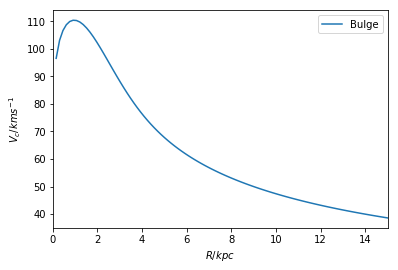

In [6]:
V_b = np.sqrt(4.*np.pi*G*q_b*rho_b_I*Vc_ad_b(R))
plt.plot(R,V_b,label='Bulge')
xlim(0.,15.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# DM Halo

Para calcular la velocidad circular de halo de materia oscura volvemos a utiliar la expresión (2.132) del libro Galactic Dynamics, Binney & Tremaine
$$\begin{equation}
v_{c}^{2} (R) = 4\pi G\sqrt{1-e^{2}} \int_{0}^{R} dm \frac{m^{2} \rho (m^{2})}{\sqrt{R^{2} - m^{2}e^{2}}}
\end{equation}$$

$$\begin{equation}
v_{c}^{2} = 4\pi Gq_{h}R^{2}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}\int_{0}^{1}dx\frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h} - \beta_{h}}
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}}{4\pi Gq_{h}} = R^{2}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}\int_{0}^{1}dx\frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h} - \beta_{h}}
\end{equation}$$

In [7]:
q_h = 0.8
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3

In [8]:
def I_h(x,R,q_h=0.8,alpha_h=-2.,a_h=a_h_I,beta_h=2.96):
    e = np.sqrt(1.- q_h**2.)
    n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
    d = np.sqrt(1-x**2.*e**2)
    t = R**2.*(R/a_h)**(-alpha_h)
    result = (t*n)/d
    return result

In [9]:
def Vc_h(l):
    Integral_DM = []
    for i in range (0,len(l)):
        result = integrate.quad(I_h,0,1,args=(l[i]))[0]
        Integral_DM.append(result)
    return np.array(Integral_DM)

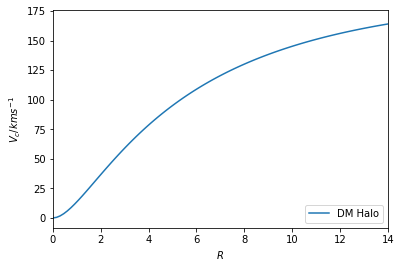

In [10]:
Vc_DM = np.sqrt(4.*np.pi*G*q_h*rho_h_I*Vc_h(R))
plt.plot(R,Vc_DM,label='DM Halo')
xlim(0.,14.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.show()

# Stelar Disk

Para calcular la velocidad circular del disco estelar seguimos una metodología distinta, explicada detalladamente en el pdf de la tesis
$$\begin{equation}
\frac{v^{2}_{c}}{2\pi G\Sigma_{d}R_{d}} =  R_{d} - e^{-R/R_{d}}(R_{d} + R) 
\end{equation}$$

$$\begin{equation}
v^{2}_{c} = 2\pi\Sigma_{d}R_{d}G\left( -e^{-R/R_{d}} - \frac{R_{d}e^{R/R_{d}}}{R}  + \frac{R_{d}}{R}\right)
\end{equation}$$

In [11]:
def V2_c_SD(R,R_d=2.0):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return result

In [12]:
#Constants
R_d_I = 2.0
Sigma_d_SD = (1905.0e6)*0.75
C_SD = 2.*np.pi*G*Sigma_d_SD*R_d_I

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


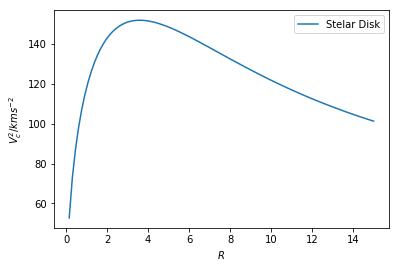

In [13]:
Vc_SD = np.sqrt(2.*np.pi*G*Sigma_d_SD*R_d_I*V2_c_SD(R))
plt.plot(R,Vc_SD,label='Stelar Disk')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V^{2}_{c}/km s^{-2}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# Interstelar medium

Para el medio interestelar seguimos el mismo procedimiento que en el caso anterior
$$\begin{equation}
V^{2}_{c} = \frac{GM(R)}{R} = \frac{2\pi G\Sigma_{g}R^{2}\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du}{R} = 2\pi G\Sigma_{g}R\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du
\end{equation}$$

In [14]:
def M_g_ISM(u,R,R_d=2.,R_m=4.):
    return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [15]:
#Constants
R_m = 4.#kpc
Sigma_g_ISM = (1905.0e6)*0.25#SM/kpc^2

In [16]:
def V_c_g_ISM(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_ISM,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    return Integral

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


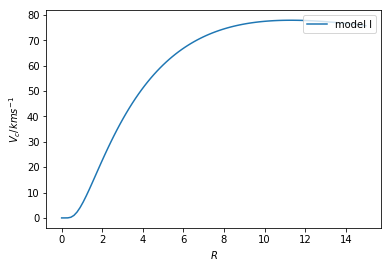

In [17]:
Vc_ISM = np.sqrt(2.*np.pi*Sigma_g_ISM*G*V_c_g_ISM(R))
plt.plot(R,Vc_ISM,label='model I')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [18]:
def Vc2_tot(l):
    V2_b = 4.*np.pi*G*q_b*rho_b_I*Vc_ad_b(l)
    V2_DM = 4.*np.pi*G*q_h*rho_h_I*Vc_h(l)
    V2_SD = 2.*np.pi*G*Sigma_d_SD*R_d_I*V2_c_SD(l)
    V2_ISM = 2.*np.pi*Sigma_g_ISM*G*V_c_g_ISM(l)
    suma = V2_b + V2_DM + V2_SD + V2_ISM
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


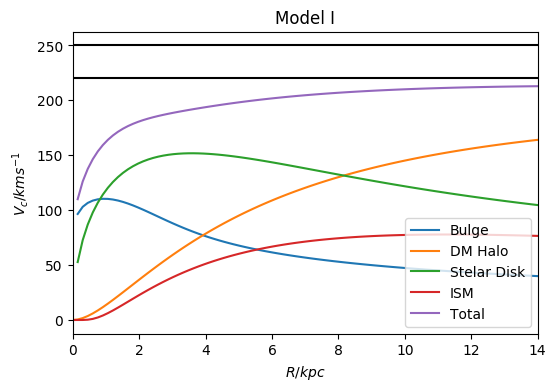

In [19]:
fig=plt.figure(dpi=100)
plt.plot(R,V_b,label='Bulge')
plt.plot(R,Vc_DM,label='DM Halo')
plt.plot(R,Vc_SD,label='Stelar Disk')
plt.plot(R,Vc_ISM,label='ISM')
plt.plot(R,Vc2_tot(R),label='Total')
xlim(0.,14.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title('Model I')
plt.hlines(220,0,15)
plt.hlines(250,0,15)
plt.show()

In [24]:
import galkin
import galkin.plots
# import auxiliary modules
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters

In [25]:
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=220.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [26]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=1					# whether to use giant molecular clouds
flagHou09tabA2=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=1				# whether to use open clusters
flagFrinchaboyMajewski08=1			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=0					# whether to use classical cepheids
flagPont94=0					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=1					# whether to use masers
flagReid14=1					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [27]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [28]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  220.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            1
  use Hou+ 09 (Table A2)?                 1
 use open clusters?                     1
  use Frinchaboy & Majewski 08?           1
 use planetary nebulae?                 0
 use cepheids?                          0
 use C stars?                           0
 use masers?                            1
  use Stepanishchev & Bobylev 11?         0
  use Honma+ 12?                        

In [30]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing giant molecular clouds...
 processing Hou+ 09 (Table A2)...
  selected  30  out of the total sample of  963  giant molecular clouds
processing open clusters...
 processing Frinchaboy & Majewski 08...
  selected  60  out of the total sample of  71  open clusters
processing masers...
 processing Reid+ 14...
  selected  80  out of the total sample of  103  masers


/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0,0.5,'$v_c$ [km/s]')

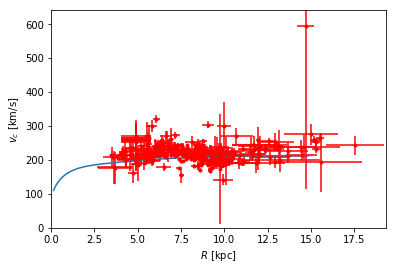

In [34]:
vecRp    =[row[0] for row in totallistvc]    # galactocentric distance [kpc]
vecerrRp =[row[1] for row in totallistvc]    # error in galactocentric distance [kpc]
vecvRp   =[row[2] for row in totallistvc]    # rotation velocity [km/s]
vecerrvRp=[row[3] for row in totallistvc]    # error in rotation velocity [km/s]
fig, ax1 = plt.subplots()
fig.canvas.set_window_title('rotation curve measurements')
fig.patch.set_facecolor('white') # setting background to white
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='r.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
plt.plot(R,Vc2_tot(R))#,label='Total')
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')

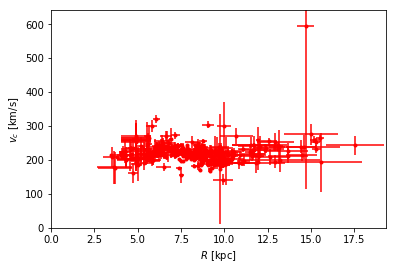

In [35]:
galkin.plots.PlotRotationCurve(totallistvc)

In [36]:
def Vc_total(R,q_b=0.6,alpha_b=1.8,r_b=1.9,a_b=a_b,q_h=0.8,alpha_h=-2.,a_h=a_h_I,beta_h=2.96,R_d=2.0,R_m=4.):
    def Vc2_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return 4.*np.pi*G*q_b*rho_b_I*np.array(Integral_b)
    def Vc2_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(l)):
            result = integrate.quad(I_h,0,1,args=(l[i]))[0]
            Integral_DM.append(result)
        return 4.*np.pi*G*q_h*rho_h_I*np.array(Integral_DM)
    def Vc2_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return 2.*np.pi*G*Sigma_d_SD*R_d_I*result
    def Vc2_ISM (R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(l)):
            result = integrate.quad(M_g_ISM,0,1,args=(l[i]))[0]
            Integral_M_g.append(result)
        return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)
    suma = Vc2_b + Vc2_DM + Vc2_SD + Vc2_ISM
    return np.sqrt(suma)

In [38]:
plt.plot(R,Vc_total(R))

TypeError: unsupported operand type(s) for +: 'function' and 'function'

In [43]:
def funcion_prueba(R,q_b=0.6,alpha_b=1.8,r_b=1.9,a_b=a_b):
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    return Vc_b(R)

In [44]:
print funcion_prueba(R)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


[       nan 0.6729298  0.76685782 0.82072704 0.85355043 0.8719694
 0.87935554 0.8778615  0.86909549 0.85438621 0.83489521 0.811664
 0.78563175 0.75763968 0.72843048 0.69864699 0.66883221 0.63943164
 0.61079815 0.583199   0.5568247  0.53179896 0.50818909 0.48601638
 0.46526595 0.44589571 0.42784422 0.41103738 0.39539383 0.3808293
 0.36725979 0.3546039  0.34278442 0.33172924 0.32137186 0.31165148
 0.30251294 0.29390639 0.28578698 0.27811435 0.2708523  0.26396829
 0.25743308 0.25122034 0.24530634 0.23966962 0.23429078 0.22915218
 0.2242378  0.21953303 0.21502452 0.21070005 0.20654841 0.20255931
 0.19872324 0.19503146 0.19147588 0.18804901 0.1847439  0.18155412
 0.17847366 0.17549695 0.17261878 0.1698343  0.16713895 0.1645285
 0.16199897 0.15954661 0.15716793 0.15485962 0.15261859 0.15044192
 0.14832686 0.1462708  0.14427131 0.14232606 0.14043287 0.13858965
 0.13679446 0.13504541 0.13334075 0.1316788  0.13005796 0.12847673
 0.12693366 0.12542738 0.12395658 0.12252002 0.12111652 0.11974493
